# Pattern Matching with Regular Expression

Without regular expression you may write programs to check whether an expression is a number or not with this
- groups
- pipe
- question mark

In [4]:
def isNumber(text):
    if len(text) != 12:
        return False
    for i in range(0, 3):
        if (not text[i].isdecimal()):
            return False
    if (text[3] != '-'):
        return False
    for i in range(4, 7):
        if (not text[i].isdecimal()):
            return False
    if (text[7] != '-'):
        return False
    for i in range(8, 12):
        if (not text[i].isdecimal()):
            return False
    return True

#print(isNumber('415-555-2312')) # should print True
#print(isNumber('Moshi-Moshi')) # should print False
#print(isNumber('Kim Audrey Magan')) # should print False

message = 'Call me at 415-555-1011 tomorrow. 415-555-9999 is my office.'
for i in range(len(message)):
    chunk = message[i:i+12]
    if isNumber(chunk):
        print('Phone number found: ' + chunk)
print('Done')


Phone number found: 415-555-1011
Phone number found: 415-555-9999
Done


#### FINDING PATTERNS OF TEXT WITH REGULAR EXPRESSION

##### Creating a regex object
Doing this, your variable <i>phoneNumRegex</i> has the object of what you passed to the compile 

In [5]:
import re
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')

##### Matching Regex Objects
a regex pbject has a search() method that searches the pattern in the string you passed into it.
- returns None if none
- returns a Match object if found
Now this Match object has a group() that returns the actual matched text

In [10]:
mo = phoneNumRegex.search('My number is 415-555-4242.') # mo must mean match object
print('Phone number found: ' + mo.group())

Phone number found: 415-555-4242


#### MORE PATTERN MATCHING WITH REGEX
##### Grouping with Parentheses
Say you want to separate the area code from the rest of the phone number. Adding parentheses creates groups in the regex

In [14]:
import re
regEx = re.compile(r'(\d\d\d)-(\d\d\d)-(\d\d\d\d)') # Group 1, 2, 3
mo = regEx.search('My number is 415-555-4242.')
print(mo.group(1))
print(mo.group(2))
print(mo.group(3))
print(mo.group(0))
print(mo.group())

415
555
4242
415-555-4242
415-555-4242


If you like to retrieve all the groups at once kinda like a list-like fashion you can use:
- groups() of the Match object

In [17]:
regEx = re.compile(r'(\d\d\d)-(\d\d\d-\d\d\d)')
mo = regEx.search('This is my phone number 415-555-4242.')
areacode, mainNumber = mo.groups()
print(areacode)
print(mainNumber)

415
555-424


If for example you need to match a parenthesis then just use escape character for it

In [20]:
regEx = re.compile(r'(\(\d\d\d\))-(\d\d\d-\d\d\d)')
# this will output by calling mo.group(1)
# >> (415) 

#### MATCHING MULTIPLE GROUPS WITH THE PIPE
The pipe is used 
- if you want to match one of many expressions, only the first matched will be assigned

In [5]:
import re
heroRegex = re.compile(r'Batman|Tina Fey')
mo1 = heroRegex.match('Batman and Tina Fey')
print(mo1.group())

mo2 = heroRegex.match('Tina Fey and Batman')
print(mo2.group())

Batman
Tina Fey


You can also do this: 
- match one of several patterns as part of your regex

In [7]:
batRegex = re.compile(r'Bat(man|mobile|copter|bat)')
mo = batRegex.search("Batmobile lost a wheel")
print(mo.group())
print(mo.group(1))

Batmobile
mobile


#### OPTIONAL MATCHING WITH THE QUESTION MARK
RegEx should find a match whether or not that bit of text us there

In [8]:
batRegex = re.compile(r"Bat(wo)?man")
mo1 = batRegex.search("Batman is dead")
print(mo1.group())
print(mo1.group(1))

mo2 = batRegex.search("Batwoman is a girl")
print(mo2.group())
print(mo2.group(1))

Batman
None
Batwoman
wo


You can thing of the ? as saying, "Match Zero or one of the group preceding thsi question mark."

#### MATCHING ZERO OR MORE WITH THE STAR
The group that precedes the start can occur any number of times in the text
\* means match zero or more

In [9]:
batRegex = re.compile(r'Bat(wo)*man')
mo1 = batRegex.search("Batman is dead!")
print(mo1.group())

mo2 = batRegex.search("Batwoman is dead!")
print(mo2.group())

mo3 = batRegex.search("Batwowowowowowowoman os dead!")
print(mo3.group())

Batman
Batwoman
Batwowowowowowowoman


#### MATCHING ONE OR MORE WITH THE PLUS
Unlike ? and \*, with plus the group preceeding the plus must appear atleast once. + means match one or more

In [12]:
batRegex = re.compile(r"Bat(wo)+man")
mo1 = batRegex.search("The adventures of Batwoman")
print(mo1.group())

mo2 = batRegex.search("The adventures of Batman")
print(mo2) 
# print(mo2.group()) wont work here because the returned object is a NoneType

mo3 = batRegex.search("The adventures of Batwowowowoman")
print(mo3.group())


Batwoman
None
Batwowowowoman


#### MATCHING SPECIFIC REPETITIONS WITH CURLY BRACES
If you have a group that you want to repeat a specific number of times, follow the group in your regex with a number in curly brackets.
- (Ha){3} this will find 'HaHaHa'
- (Ha){3, 5} this will find 'HaHaHa', 'HaHaHaHa', 'HaHaHaHaHa'
- (Ha){, 5} from 0 - 5 appearances

In [23]:
haRegex = re.compile(r"(Ha){3}")
mo1 = haRegex.search("HaHaHaHa! You are Hillarious!")
print(mo1.group())

haRegex = re.compile(r"(Ha){3,5}")
mo2 = haRegex.search("HaHaHaHa! You are Hillarious!") #Yung pang-apat nakuha kasi yun pinakamatch
print(mo2.group())


HaHaHa
HaHaHaHa


#### GREEDY AND NONGREEDY MATCHING
Python's regular expression are greedy by deafult that means with {3, 5} it will return HaHaHaHaHa. Now, the non-greedy version has a question mark after the closing curly bracket

(Ha){3, 5}?

In [24]:
greedyHaRegex = re.compile(r"(Ha){3,5}")
mo1 = greedyHaRegex.search("HaHaHaHaHa! You are hillarious")
print(mo1.group())

nongreedyHaRegex = re.compile(r"(Ha){3,5}?")
mo2 = nongreedyHaRegex.search("HaHaHaHaHa! You are hillarious!")
print(mo2.group())

HaHaHaHaHa
HaHaHa


#### THE findall() METHOD
This method will return the strings of every match in the searched string 
- This method returns a list of strings BUT <i>as long as there are no groups in the regular expression.

In [25]:
phoneNumRegex = re.compile(r"\d\d\d-\d\d\d-\d\d\d\d") # has no groups
myPhoneList = phoneNumRegex.findall("Cell: 415-555-9999 Work: 212-555-0000")
print(myPhoneList)

['415-555-9999', '212-555-0000']


<b>IF THERE ARE GROUPS THEN findall() WILL RETURN LIST OF TUPLES</b>

In [26]:
phoneNumRegex = re.compile(r"(\d\d\d)-(\d\d\d)-(\d\d\d\d)")
myPhoneList = phoneNumRegex.findall("Cell: 415-555-9999 Work: 212-555-0000")
print(myPhoneList)

[('415', '555', '9999'), ('212', '555', '0000')]


#### CHARACTER CLASSES

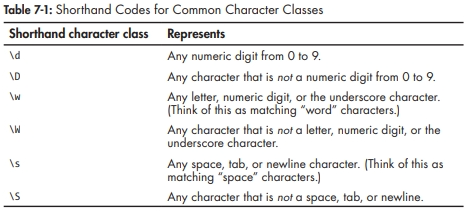

In [32]:
xmasRegex = re.compile(r"\d+\s\w+")
myXmasList = xmasRegex.findall("12 drummers, 11 pipers, 10 lords, 9 ladies, 8 maids, 7 swans, 6 geese, 5 rings, 4 birds, 3 hens, 2 doves, 1 partridge")
print(myXmasList)

['12 drummers', '11 pipers', '10 lords', '9 ladies', '8 maids', '7 swans', '6 geese', '5 rings', '4 birds', '3 hens', '2 doves', '1 partridge']


#### MAKING YOUR OWN CHARACTER CLASSES
There are times when you want to match a set of charatcers but the shorthand caharcters are too broad

In [34]:
vowelRegex = re.compile(r"[aeiouAEIOU]")
print(vowelRegex.findall("Joey doesn't share food!"))

['o', 'e', 'o', 'e', 'a', 'e', 'o', 'o']


You can also do this:
- [a-zA-Z0-9]
- by adding "^" before the characters in the class you can get the expressions not in those class. It's like a negation

In [35]:
vowelRegex = re.compile(r"[^aeiouAEIOU]")
print(vowelRegex.findall("Joey doesn't share food!"))

['J', 'y', ' ', 'd', 's', 'n', "'", 't', ' ', 's', 'h', 'r', ' ', 'f', 'd', '!']


#### THE CARET AND DOLLAR SIGN
You can use the caret sign to indicate that your regex is the start of the string whereas you can use the dollar sign to indicate that your regex is at the end of the string

In [39]:
beginsWithHello = re.compile(r"^Hello")
mo1 =  beginsWithHello.search("Hello World")
print(mo1.group())

beginsWithHello = re.compile(r"^Hello")
mo1 =  beginsWithHello.search("He said hello World")
try:
    print(mo1.group())
except AttributeError:
    print("It has no group() because what returned was a NoneType")
print("Nicole")

Hello
It has no group() because what returned was a NoneType
Nicole


#### USING THE $ SIGN

In [45]:
endsWithNumber = re.compile(r"\d$")
print(endsWithNumber.search("My number is 42").group())

endsWithNumber = re.compile(r"\d$")
print(endsWithNumber.search("My number is forty two") ==  None)

2
True


#### USING BOTH ^ AND $ SIGN
"Carrots cost dollars."

In [47]:
wholeStringIsNum = re.compile(r"^\d*$")
print(wholeStringIsNum.search("0123456789"))

<re.Match object; span=(0, 10), match='0123456789'>


#### THE WILDCARD CHARACTER
The dot is like an alternative

In [57]:
atRegex = re.compile(r".at")
print(atRegex.search("The cat in the hat sat on the flat mat.").group())

print(atRegex.findall("ats The cat in the hat sat on the flat mat.")) # does not print the "ats" it means 
# that expressions that end only with "at"

cat
['cat', 'hat', 'sat', 'lat', 'mat']


#### USING THE DOT STAR TECHNIQUE
If you want to match everything and anything
- dot-star uses greedy mode, it will read as much character as possible
- so to make it nongreedy use the question mark after the star (.*?)

In [60]:
dotStar = re.compile(r"Name:\s(.*)\sLast Name:\s(.*)")
mo = dotStar.search("Hello this is the full name you are looking for. Name: Nicole Last Name: Magan")
print(mo.group(1))
print(mo.group(2))
print(mo.group())

Nicole
Magan
Name: Nicole Last Name: Magan


In [63]:
# Dot-star being nongreedy:
nongreedyRegex = re.compile(r"<.*?>")
mo = nongreedyRegex.search("<To serve man> for dinner.>")
print(mo.group())

# Dot-star being greedy
nongreedyRegex = re.compile(r"<.*>")
mo = nongreedyRegex.search("<To serve man> for dinner.>")
print(mo.group())

<To serve man>
<To serve man> for dinner.>


<b>Explanation</b><br>Match an opening angle bracket, followed by anything, followed by a closing angle bracket. But the string "\<To serve man> for dinner.>" has two possible closing angle. <br>In the nongreedy version of the regex, ython matches the shortest possible string.

#### MATCHING NEWLINES WITH THE DOT CHARACTER
By passing:
- re.DOTALL<br>
You can make the dot character match all charatcers, including the newline character

In [67]:
# without the re.DOTALL
noNewlineRegex = re.compile(".*")
mo1 = noNewlineRegex.search("Kim\nAudrey\nMagan")
print(mo1.group())

# with the re.DOTALL
newlineRegex = re.compile(".*", re.DOTALL)
mo2 = newlineRegex.search("Kim\nAudrey\nMagan")
print(mo2.group())

Kim
Kim
Audrey
Magan


#### REVIEW OF SYMBOLS
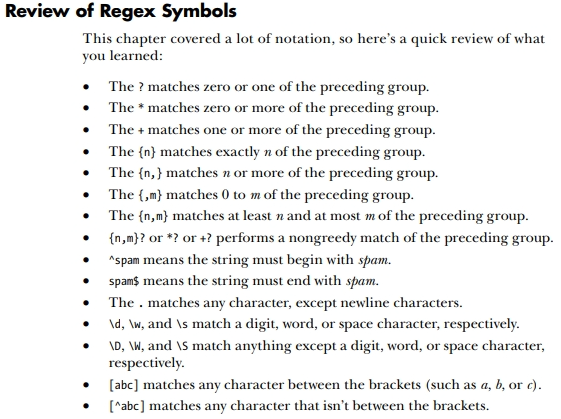

#### CASE-INSENSITIVE MATCHING
To make your regex case-insensitive, you can pass the ff. to re.compile
- re.IGNORECASE or re.I


In [69]:
robocop = re.compile("robocop", re.I)
print(robocop.search("RoboCop is part man, part machine, all cop.").group())

print(robocop.search("ROBOCOP protects the innocent.").group())

print(robocop.search("Al, why does your book talk about robocop so much?").group())

RoboCop
ROBOCOP
robocop


## SUBSTITUTING STRINGS WITH THE sub() METHOD
RegEx cannot only find text patterns but also substitute text to those patterns. 
- 1st arg: the string to substitute to the regEx
- 2nd arg: the string

In [2]:
import re
namesRegex = re.compile(r"Agent \w+")
newString = namesRegex.sub("CENSORED", "Agent Nicole wishes Agent Kim a good night.")
print(newString)

CENSORED wishes CENSORED a good night.


#### PASSING \1\2\3 ... TO sub()
Use this when you need to use the matched text itself as a part of the substitution
- they are the first argument
- the number just mean the number of the group
- so that means your regex must have groups
- The \n in that string will be replaced by whatever text was matched by group 1

In [75]:
# For example, you may want to censor the names of the secret agents by showing just the first letter of their names.
agentNamesRegex = re.compile(r"Agent\s(\w)\w*")
newString = agentNamesRegex.sub(r"\1****", "Agent Nicole told Agent Carol that Agent Eve knew Agent Kim was a double agent.")
print(newString)

N**** told C**** that E**** knew K**** was a double agent.


#### COMBINING re.IGNORECASE, re.DOTALL, & re.VERBOSE
YOU CANT! Because re.compile() only accepts two arguments but you can do it like this:

In [1]:
import re
someRegexValue = re.compile("Foo", re.IGNORECASE | re.DOTALL | re.VERBOSE)